# Regularización

## Importamos las Librerías

In [1]:
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


## Cargamos los datos

In [2]:
data=pd.read_csv("./data/possum.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data/possum.csv'

# split del dataset

In [ ]:
# División de los datos en train y test

X = data.drop(columns='totlngth')
y = data['totlngth']

X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2,random_state = 42)

X_train=pd.DataFrame(X_train,columns=data.drop(columns='totlngth').columns)
X_test=pd.DataFrame(X_test,columns=data.drop(columns='totlngth').columns)

data_train=pd.concat([X_train,pd.DataFrame(y_train,columns=['totlngth'])],axis=1)

# descripción del dataset

In [ ]:
X_train.head()

,case,site,Pop,sex,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
55,56,4,other,m,3.0,99.9,61.5,38.0,68.7,46.8,16.4,27.5,31.5
22,23,1,Vic,f,4.0,92.5,56.1,36.0,72.8,53.3,15.4,28.0,35.0
76,77,6,other,m,6.0,93.6,56.2,36.0,62.8,42.9,16.2,25.0,35.0
44,45,2,Vic,m,3.0,90.7,55.9,34.0,71.5,54.0,14.6,27.0,31.5
72,73,5,other,m,1.0,82.5,52.3,36.5,65.7,44.7,16.0,23.5,28.0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 55 to 102
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      83 non-null     int64  
 1   site      83 non-null     int64  
 2   Pop       83 non-null     object 
 3   sex       83 non-null     object 
 4   age       82 non-null     float64
 5   hdlngth   83 non-null     float64
 6   skullw    83 non-null     float64
 7   taill     83 non-null     float64
 8   footlgth  82 non-null     float64
 9   earconch  83 non-null     float64
 10  eye       83 non-null     float64
 11  chest     83 non-null     float64
 12  belly     83 non-null     float64
dtypes: float64(9), int64(2), object(2)
memory usage: 11.1+ KB


In [ ]:
X_train.describe()

,case,site,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
count,83.000000,83.000000,82.000000,83.000000,83.000000,83.000000,82.000000,83.000000,83.000000,83.000000,83.000000
mean,52.759036,3.626506,3.719512,92.504819,56.875904,37.042169,68.286585,48.083133,15.066265,26.945783,32.457831
std,29.632131,2.304348,1.820829,3.746996,3.189372,1.960284,4.451210,4.117269,1.042894,2.037771,2.745512
min,2.000000,1.000000,1.000000,82.500000,50.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,27.000000,1.000000,2.250000,90.400000,54.850000,36.000000,64.500000,44.800000,14.450000,25.500000,31.000000
50%,53.000000,3.000000,3.000000,92.800000,56.400000,37.000000,67.750000,46.800000,15.000000,27.000000,32.000000
75%,76.500000,6.000000,5.000000,94.750000,58.100000,38.000000,72.475000,52.000000,15.850000,28.000000,34.000000
max,104.000000,7.000000,9.000000,103.100000,68.600000,41.500000,77.900000,56.200000,17.800000,32.000000,40.000000


In [ ]:
X_train.describe(include='O')

,Pop,sex
count,83,83
unique,2,2
top,other,m
freq,47,48


In [ ]:
X_train.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         1
hdlngth     0
skullw      0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

## Exploratory Data Analysis

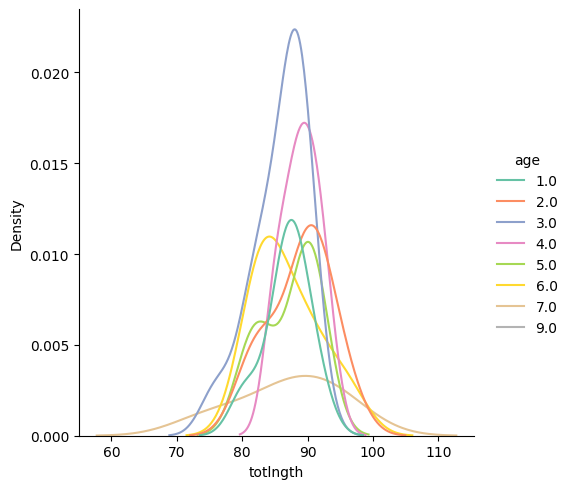

In [ ]:
sns.displot(hue='age',x='totlngth',data=data_train, palette='Set2', kind='kde')
plt.show()

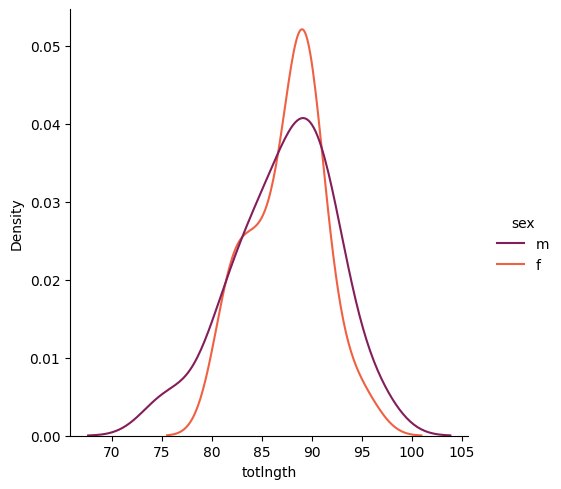

In [ ]:
sns.displot(x='totlngth',hue='sex',data=data_train,palette='rocket',kind="kde")
plt.show()

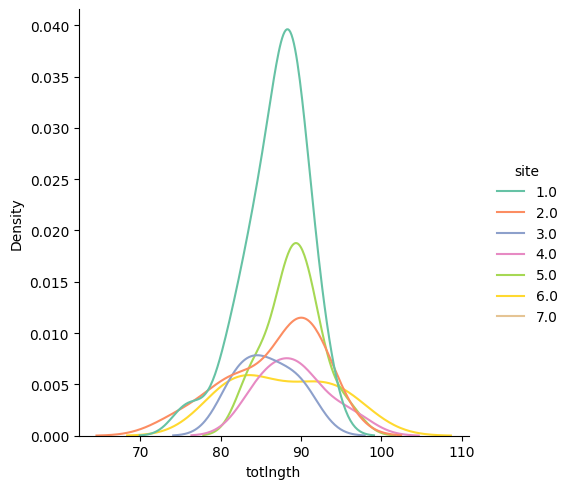

In [ ]:
sns.displot(hue='site',x='totlngth',data=data_train,palette='Set2', kind='kde')
plt.show()

<Figure size 1000x1000 with 0 Axes>

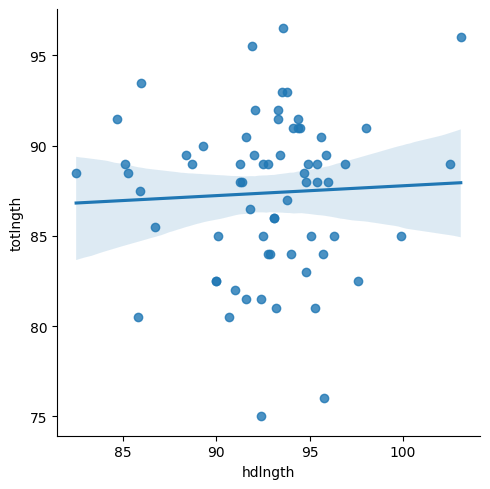

In [ ]:
plt.figure(figsize=(10,10))
sns.lmplot(x='hdlngth',y='totlngth', data=data_train)
plt.show()

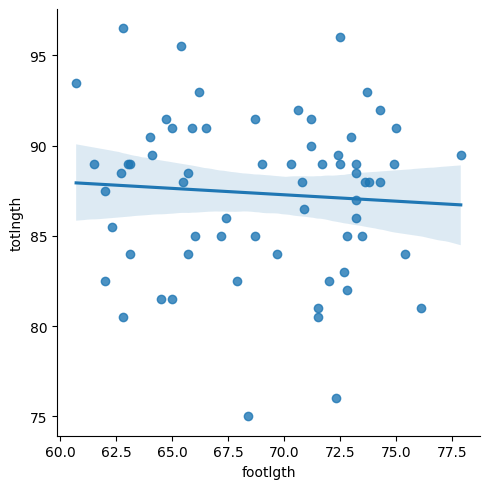

In [ ]:
sns.lmplot(x='footlgth',y='totlngth',data=data_train)
plt.show()

### Estudio de Correlación

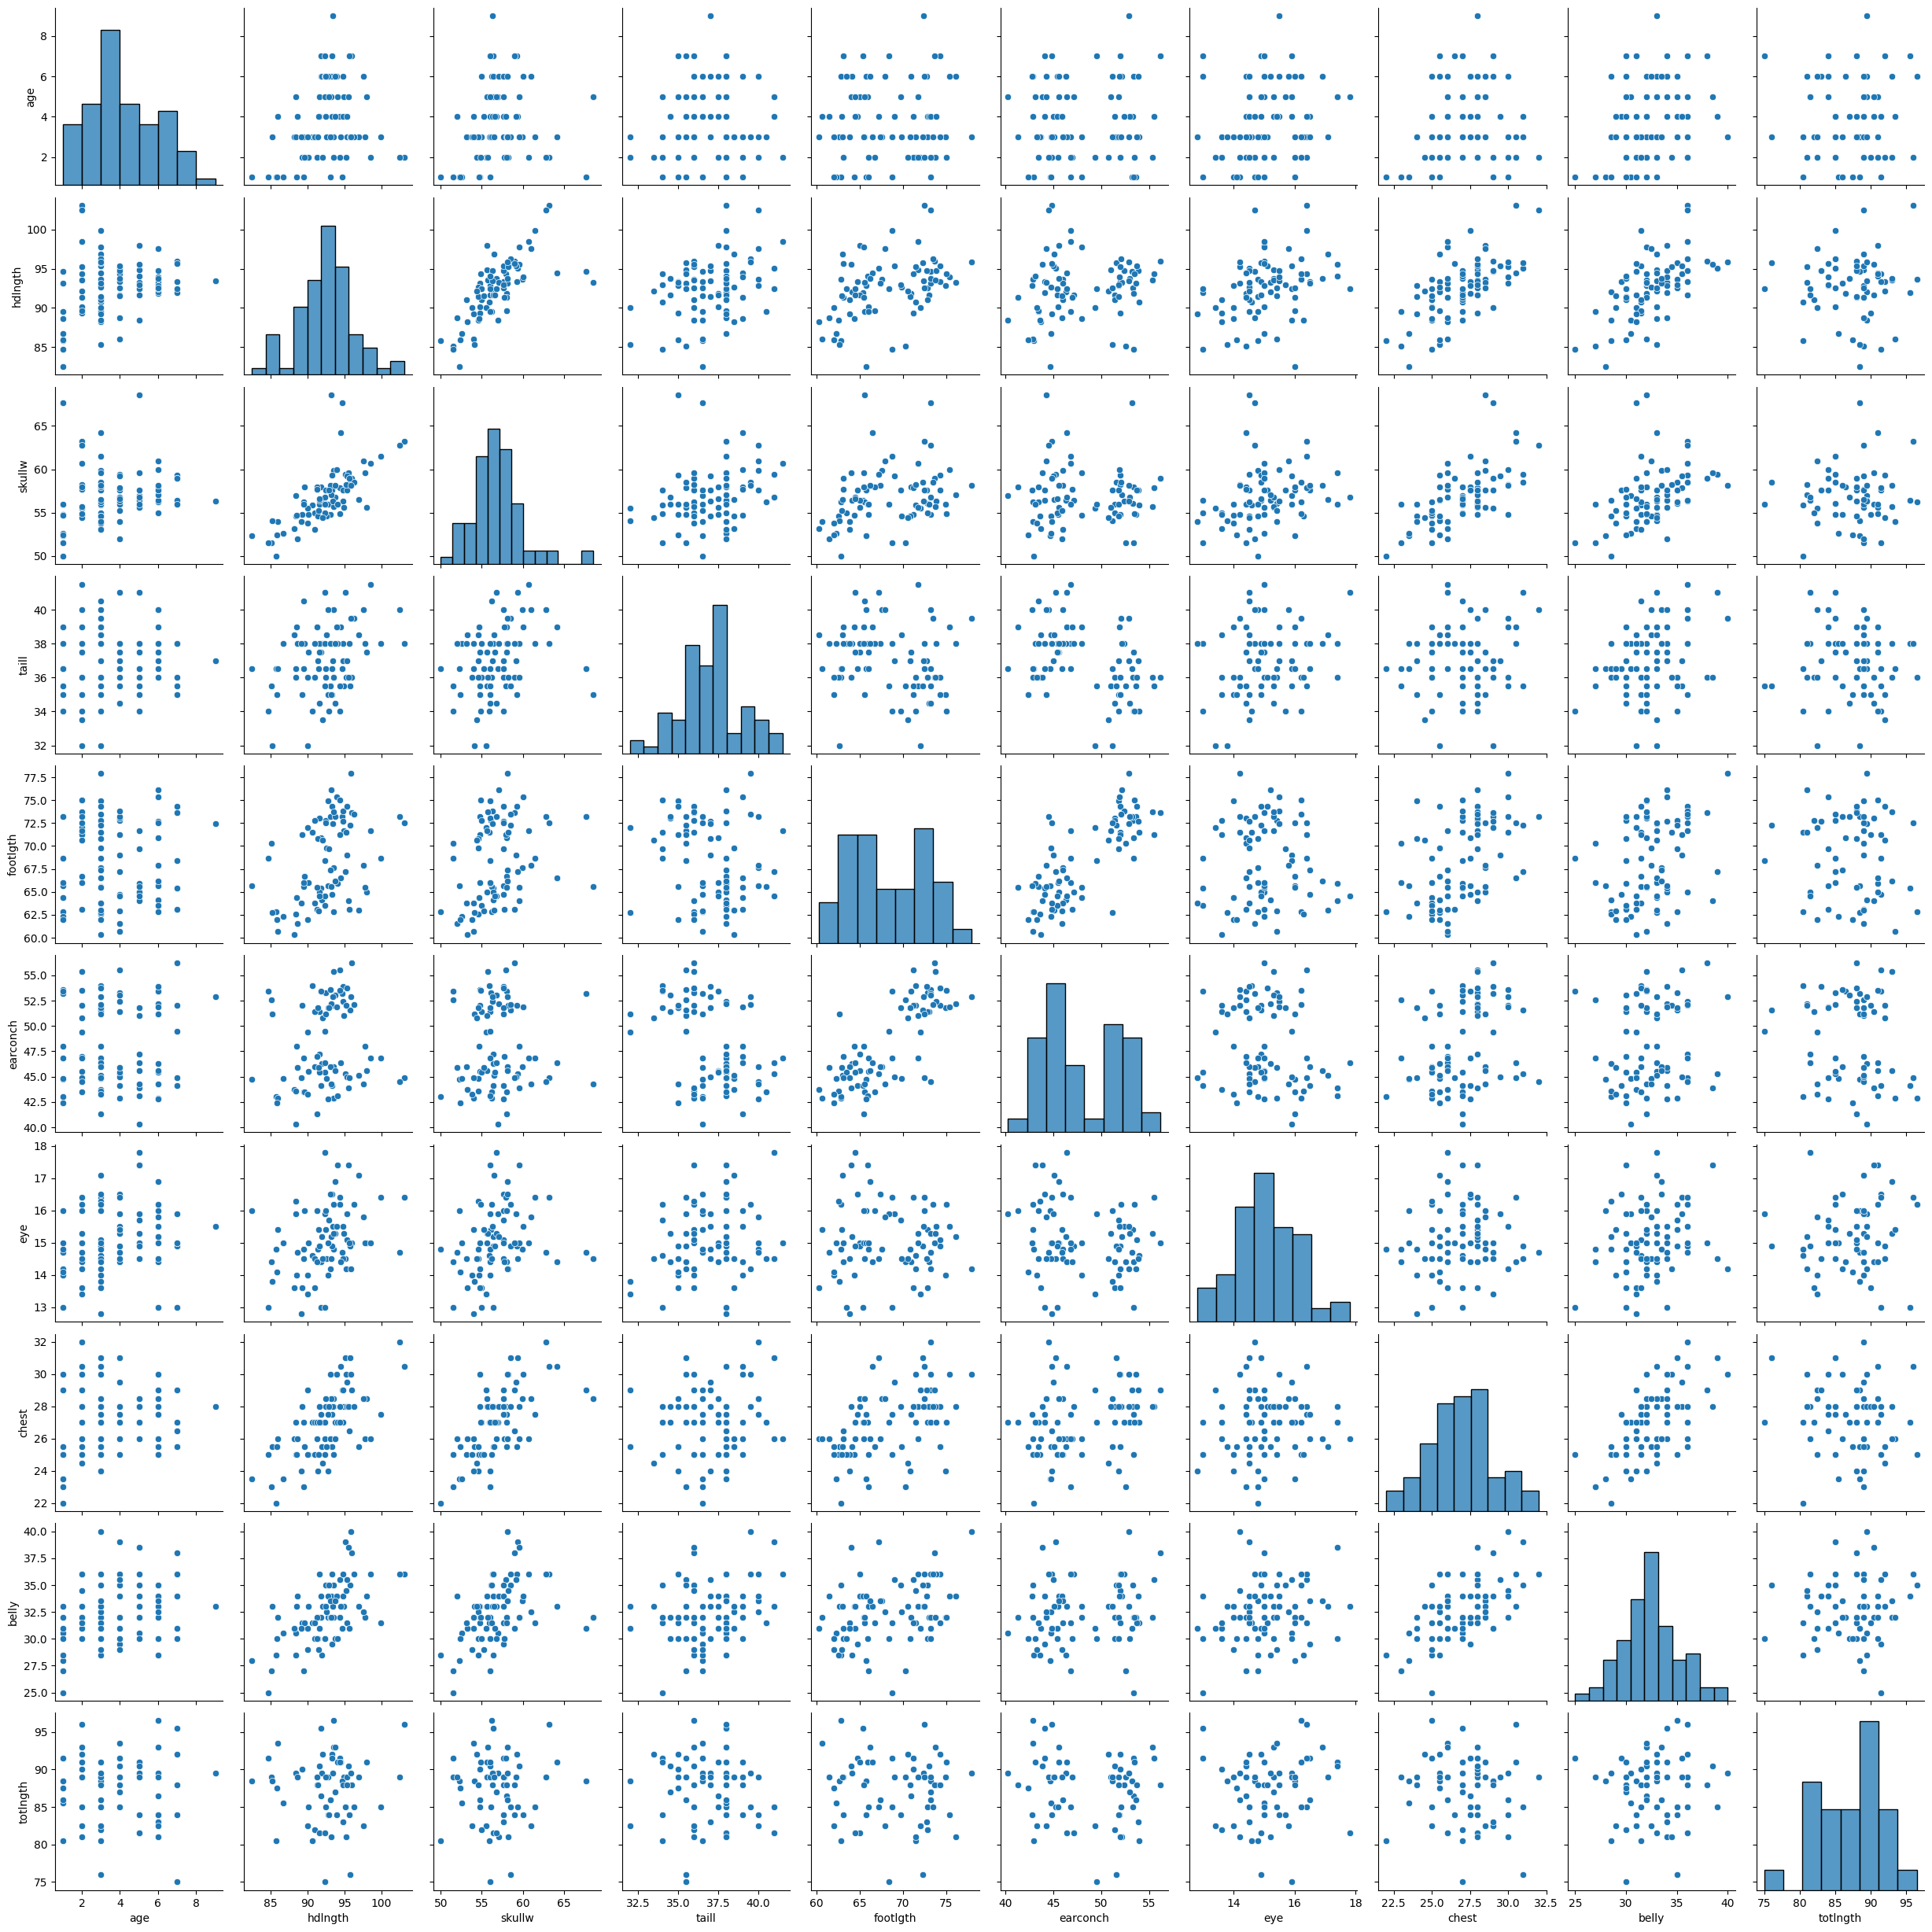

In [ ]:
sns.pairplot(data_train.drop(columns=['case','site','Pop','sex']))

<Axes: >

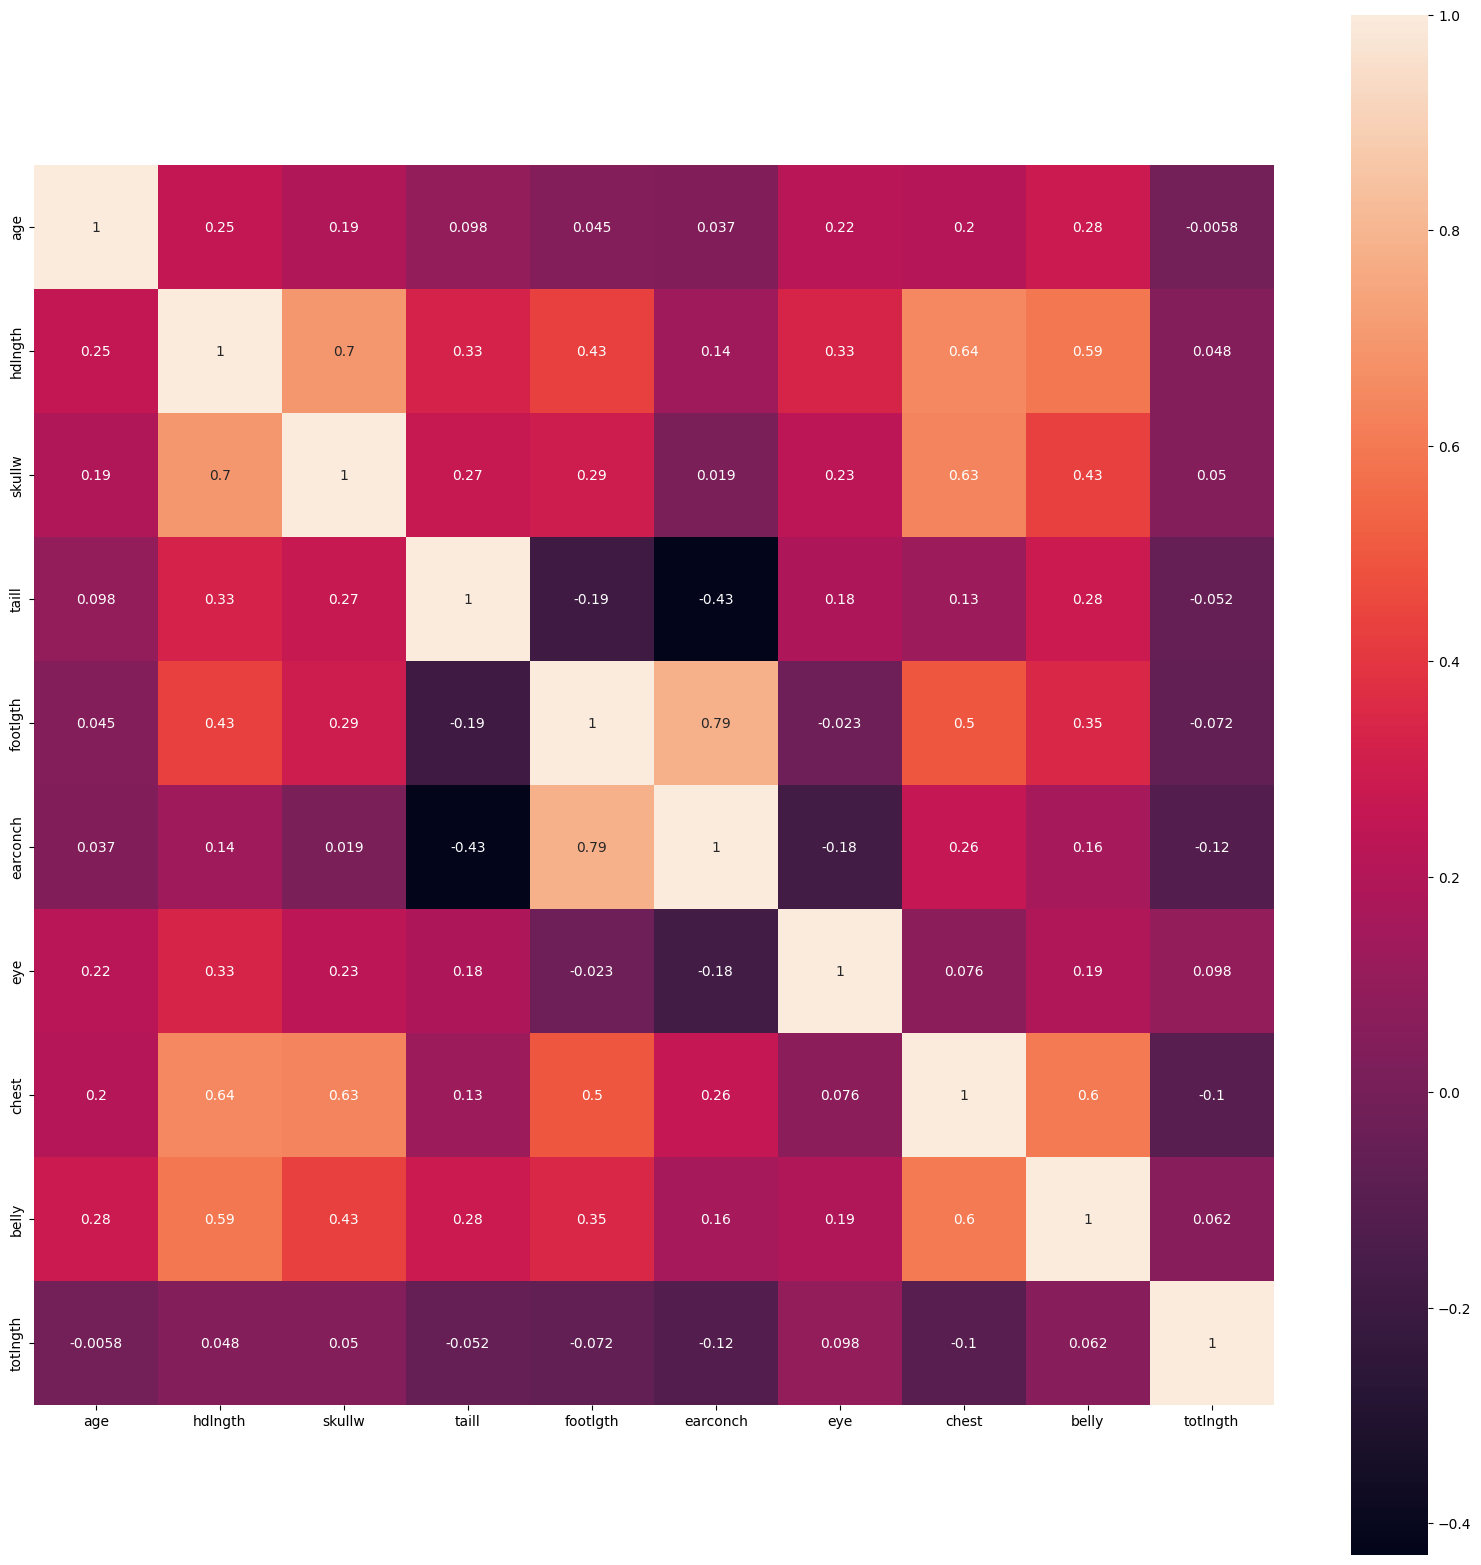

In [ ]:
corr_matrix = data_train.drop(columns=['case','site','Pop','sex']).corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(corr_matrix, square=True,ax=ax,annot=True)

## Ingeniería de características

In [ ]:
X_train.head()

,case,site,Pop,sex,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
55,56,4,other,m,3.0,99.9,61.5,38.0,68.7,46.8,16.4,27.5,31.5
22,23,1,Vic,f,4.0,92.5,56.1,36.0,72.8,53.3,15.4,28.0,35.0
76,77,6,other,m,6.0,93.6,56.2,36.0,62.8,42.9,16.2,25.0,35.0
44,45,2,Vic,m,3.0,90.7,55.9,34.0,71.5,54.0,14.6,27.0,31.5
72,73,5,other,m,1.0,82.5,52.3,36.5,65.7,44.7,16.0,23.5,28.0


In [ ]:
X_train = X_train.drop(columns=['case','site','Pop','sex'])

In [ ]:
X_train.head()

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
55,3.0,99.9,61.5,38.0,68.7,46.8,16.4,27.5,31.5
22,4.0,92.5,56.1,36.0,72.8,53.3,15.4,28.0,35.0
76,6.0,93.6,56.2,36.0,62.8,42.9,16.2,25.0,35.0
44,3.0,90.7,55.9,34.0,71.5,54.0,14.6,27.0,31.5
72,1.0,82.5,52.3,36.5,65.7,44.7,16.0,23.5,28.0


In [ ]:
X_train.isna().sum()

age         1
hdlngth     0
skullw      0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [ ]:
y_train=y_train[~np.isnan(X_train).any(axis=1)]
X_train.dropna(inplace=True)


In [ ]:
### hago lo mismo para xtest
X_test = X_test.drop(columns=['case','site','Pop','sex'])

y_test=y_test[~np.isnan(X_test).any(axis=1)]
X_test.dropna(inplace=True)


## Modelos

A continuación, experimentaremos con modelos de regresión lineal estándar y modelos regularizados con Ridge, Lasso y ElasticNet.

### Regresión Lineal

In [ ]:
# Creación y entrenamiento del modelo
# La idea es estandarizar los datos para tener todo en la misma escala. Esto presenta muchas ventajas a la hora de regularizar.
# lo que hacemos es una "tubería": vamos a escalar los datos y luego hacer una regresión lineal. Cuando fiteemos esta tubería, el fit se va a hacer tanto en el scaler como en la regresión lineal.
# a la hora de predecir datos, está bueno porque solo vamos a usar el método predict de la tubería y eso automáticamente va a usar el transform del scaler y el predict de la regresión lineal
# ahorra muchos pasos, estandariza los procesos, recomendamos su uso aunque NO es estrictamente necesario, simplemente pueden usar los componentes por separado.

# El uso del pipeline permite que ambos pasos (escalado y regresión) se realicen secuencialmente de manera automática, sin tener que hacer el escalado de los datos manualmente antes de ajustar el modelo.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LinearRegression())

In [ ]:
model.fit(X_train, y_train)
#entrena el modelo creado por el pipeline con los datos de entrenamiento.

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
model.steps[0][1]
#proporciona acceso al primer paso del pipeline, que en este caso es el escalador StandardScaler.

array([ 3.7037037 , 92.64691358, 56.94074074, 37.06790123, 68.2617284 ,
       48.12345679, 15.06419753, 26.99382716, 32.54938272])

In [ ]:
model.steps[1][1].coef_
# proporciona acceso a los coeficientes del modelo de regresión lineal, que es el segundo paso del pipeline.

array([[ 0.3487172 ,  1.06301148,  0.02639009,  2.43317211,  1.62072416,
         0.02737745,  0.14175009,  0.62529939, -0.01268367]])

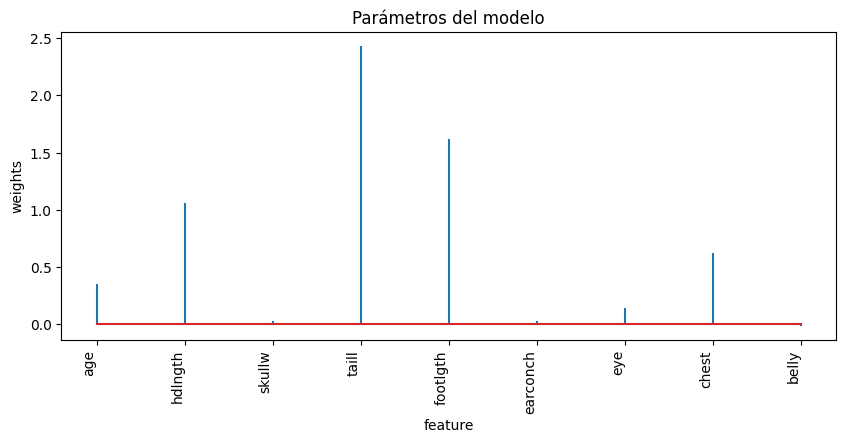

In [ ]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model.steps[1][1].coef_.flatten()})
# flatten() convierte el array de coeficientes en una versión unidimensional, independientemente de cuántas dimensiones tenga originalmente.
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

In [ ]:
# Predicciones
y_pred = model.predict(X_test)
#predicciones = predicciones.flatten()
#predicciones[:10]
y_pred.shape, y_test.shape

((20, 1), (20, 1))

In [ ]:
# Error de test del modelo. Uso rmse para mantener la misma escala que la variable a predecir

rmse_ols = mean_squared_error(y_test, y_pred, squared = False)

print(f"El error (rmse) de test es: {rmse_ols}")

El error (rmse) de test es: 3.0084547934194448


In [ ]:
R2 = metrics.r2_score(y_test, y_pred)
R2

0.1893595840529837

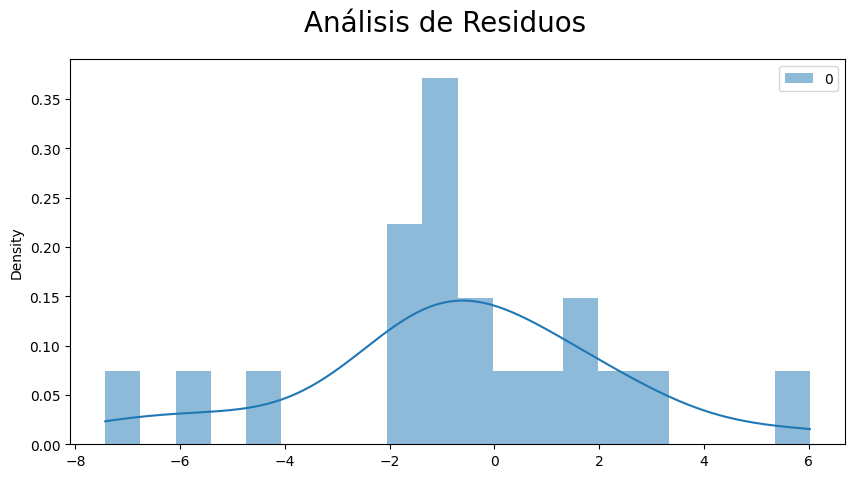

In [ ]:
fig = plt.figure(figsize=(10,5))

sns.histplot((y_test - y_pred), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)
plt.show()

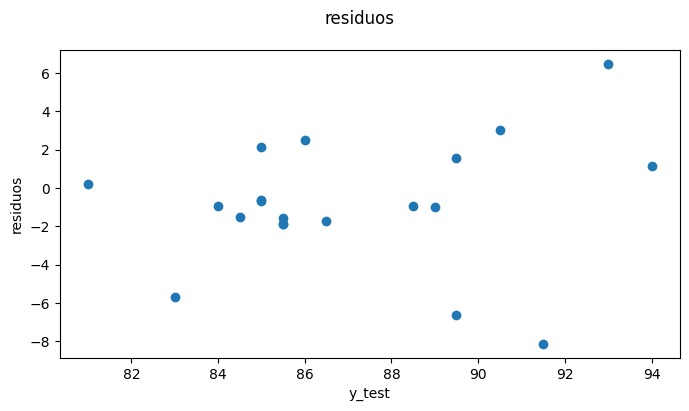

In [ ]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test,100*(y_test-y_pred)/y_test)
plt.show()

Vemos los residuos porcentuales, la mayoría se encuentran dentro de +/-2%.

Las zonas de y_test baja la regresión está subestimando, mientras que en y_test altos, sobreestima.

### Ridge Regression

Aplica regresión de Ridge, pero con validación cruzada para seleccionar el valor óptimo de 𝛼, el parámetro de regularización.

La regularización de Ridge es útil principalmente para manejar problemas de sobreajuste (overfitting) en modelos de regresión, particularmente cuando se trabaja con datos multicolineales o cuando el número de predictores es grande en relación con el número de observaciones.

In [ ]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha
# (lambda en los desarrollos de teoría). Puede ser problemático con series de tiempo.

modelo = make_pipeline(StandardScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-3, 6, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train, y_train)

alphas = Este parámetro define el rango de valores de 𝛼 (el parámetro de regularización de Ridge) que se van a probar en la validación cruzada.

np.logspace(-3, 6, 200) genera 200 valores de 𝛼 en una escala logarítmica, que van desde 10e−3 hasta 10e-6. Ridge penaliza los coeficientes grandes y controla el sobreajuste, y α ajusta la fuerza de esta penalización.

fit_intercept=True: Indica que el modelo ajustará un intercepto

store_cv_values=True: Este parámetro almacena los valores de los errores de la validación cruzada para cada valor de 𝛼, lo que te permitirá evaluar cuál 𝛼 ha sido el mejor durante el ajuste.

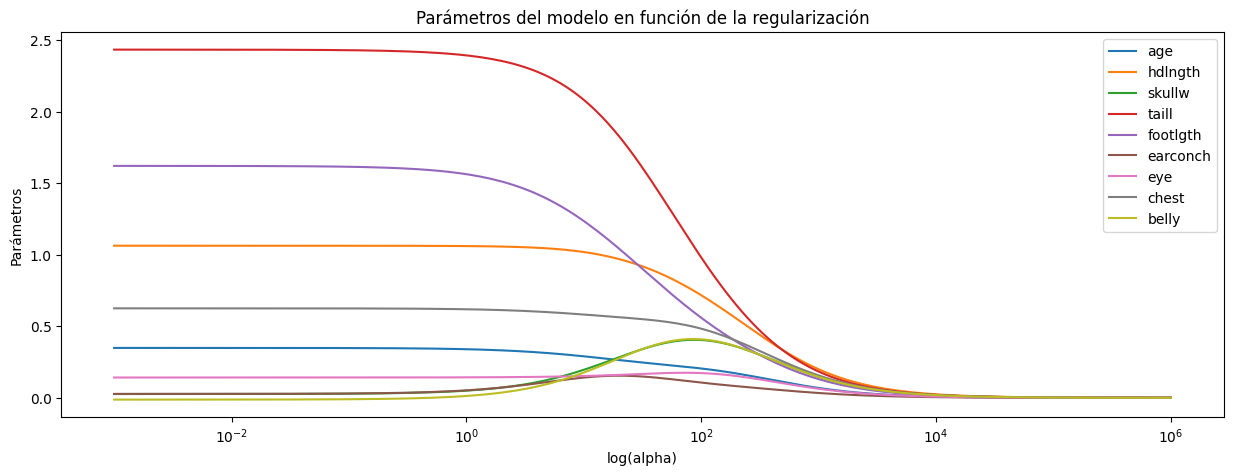

In [ ]:
# Evolución de los parámetros en función de alpha

alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

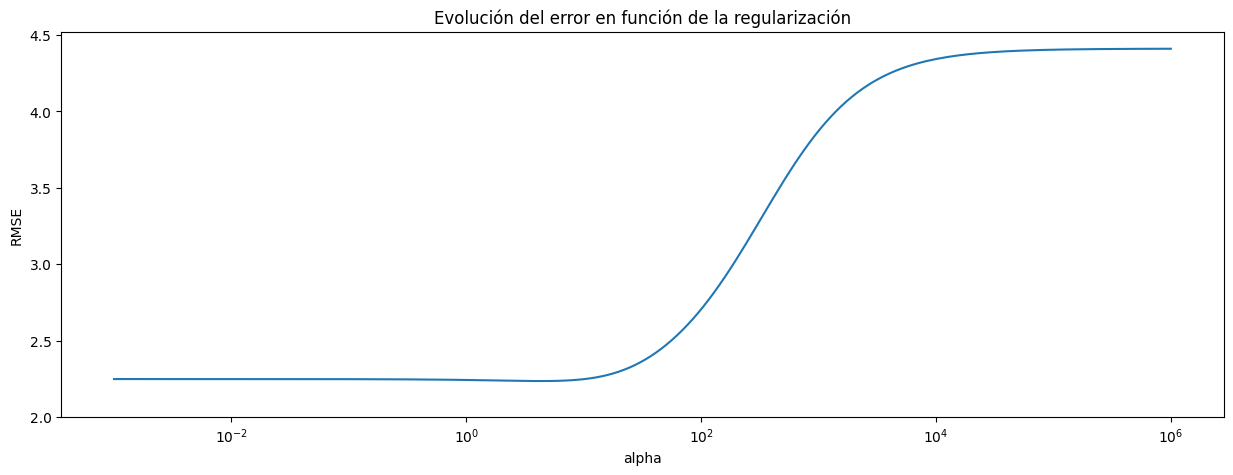

In [ ]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo.steps[1][1]

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [ ]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 4.150404757850477


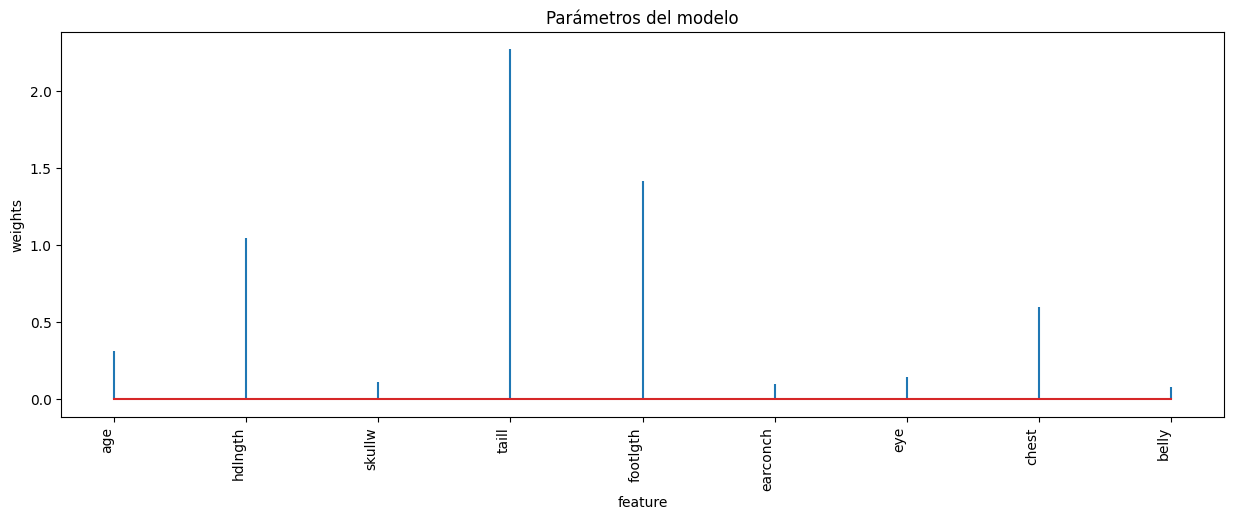

In [ ]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

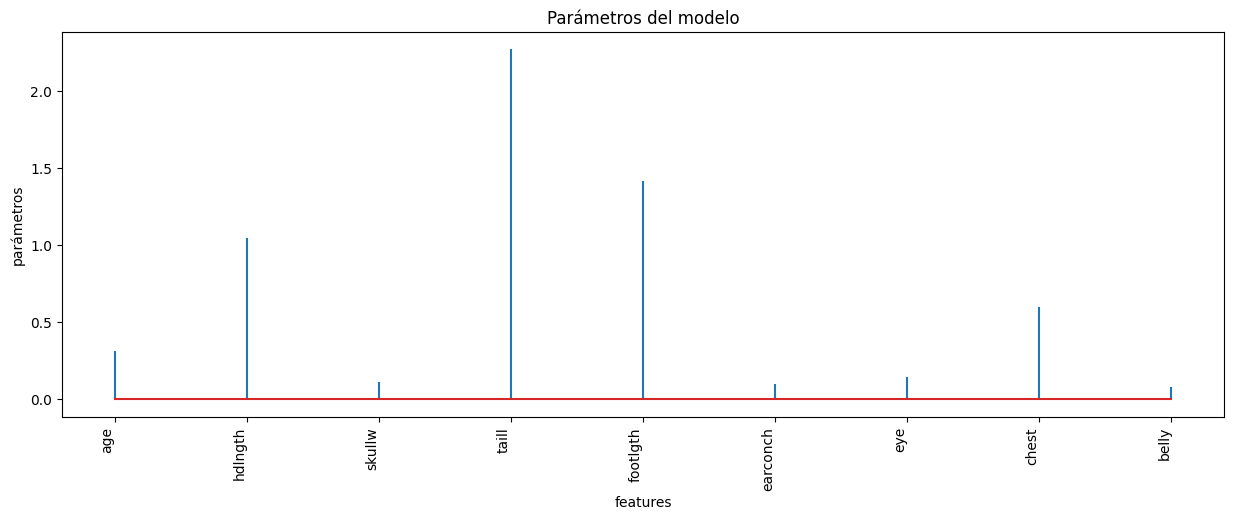

In [ ]:
# Parámetros del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [ ]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [ ]:
# Error de test del modelo

rmse_ridge = mean_squared_error(y_test,
                y_pred,
                squared = False
             )

print(f"El error (rmse) de test es: {rmse_ridge}")

El error (rmse) de test es: 2.912797913059513


In [ ]:
R2 = metrics.r2_score(y_test, y_pred)

In [ ]:
R2

0.2400903105845179

### Lasso Regression

Lasso ajusta los coeficientes de las variables para evitar el sobreajuste, y también puede reducir algunos coeficientes a exactamente cero. Esto significa que efectivamente elimina ciertas variables que no aportan información relevante al modelo.

Esta propiedad hace que Lasso sea muy útil para la selección de características

Manejo de multicolinealidad:
Al igual que Ridge, Lasso puede manejar problemas de multicolinealidad, pero lo hace de manera diferente. Cuando hay variables altamente correlacionadas, Lasso tiende a elegir una sola de ellas y establecer los coeficientes de las otras en cero. Esto puede ser útil para seleccionar entre variables correlacionadas.

Ridge, por otro lado, distribuye los pesos entre las variables correlacionadas, sin eliminar ninguna


In [ ]:
modelo = make_pipeline(StandardScaler(),
                        LassoCV(
                           alphas=np.logspace(-3, 6, 200),
                           cv=10
                        )
         )

_ = modelo.fit(X_train, y_train)

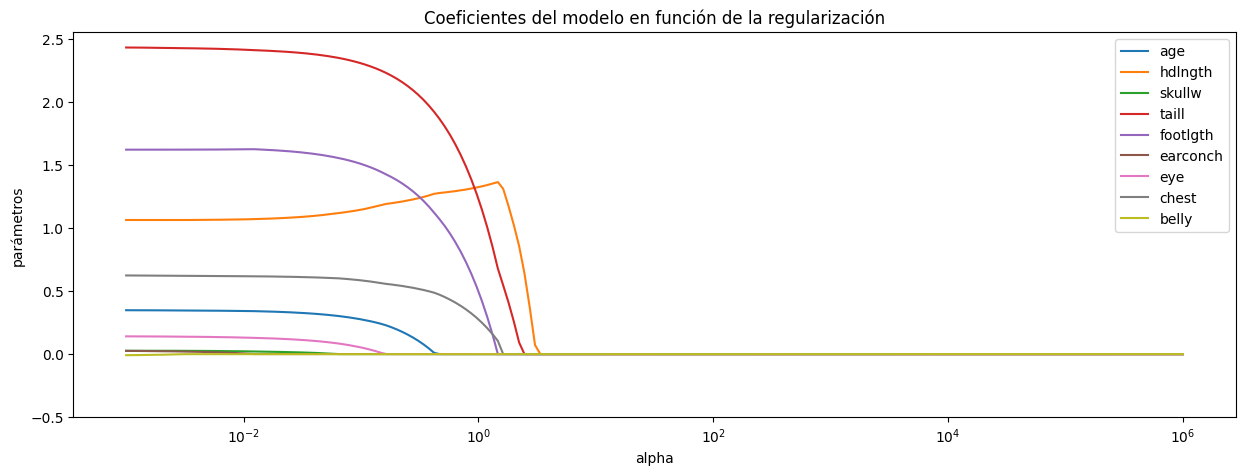

In [ ]:
# Evolución de los parámetros en función de alpha

mod = modelo.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

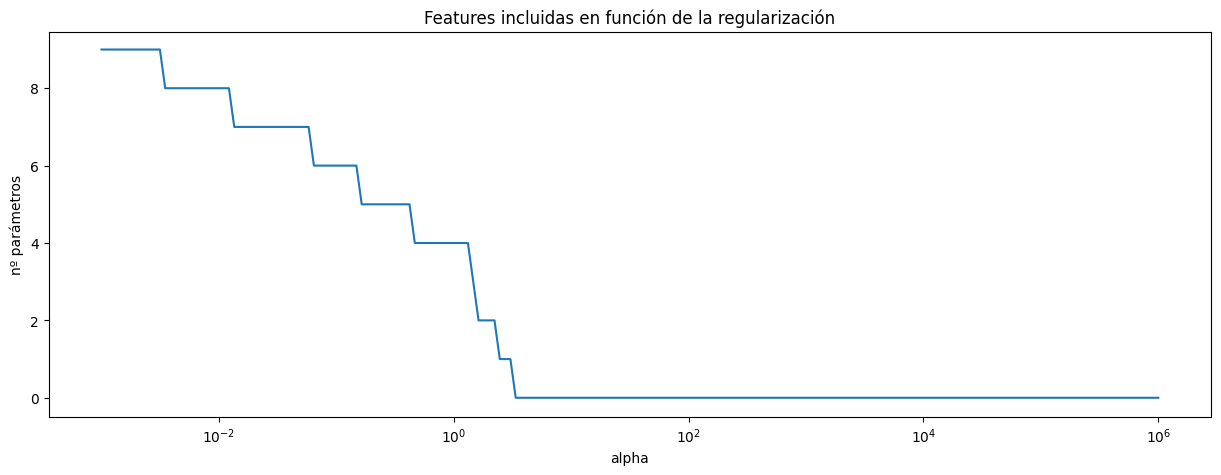

In [ ]:
# Número de features incluidas (parámetros !=0) en función de alpha
alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

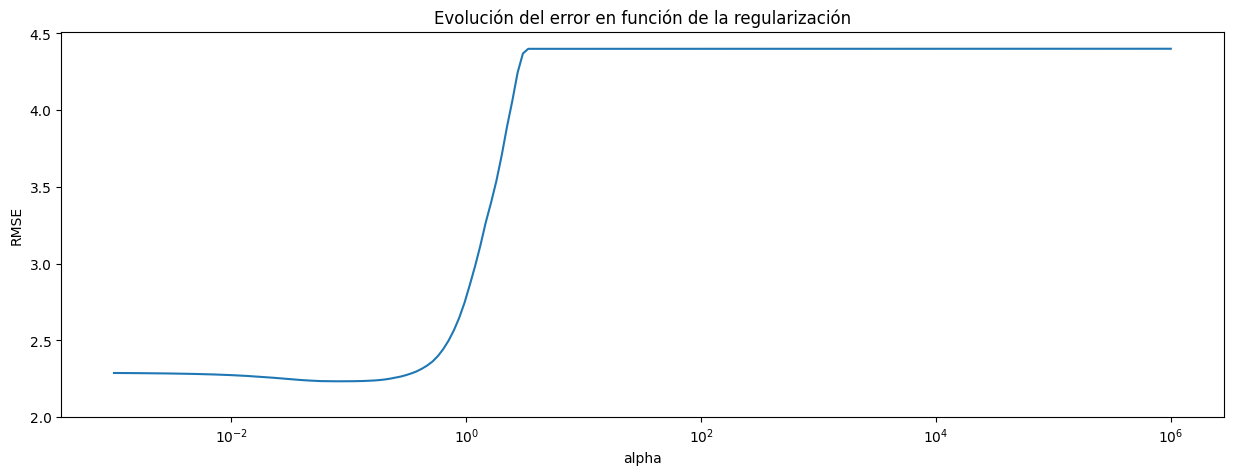

In [ ]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [ ]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 0.07934096665797492


In [ ]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,age,0.290635
1,hdlngth,1.129190
3,taill,2.330400
4,footlgth,1.534930
6,eye,0.070569
7,chest,0.593733


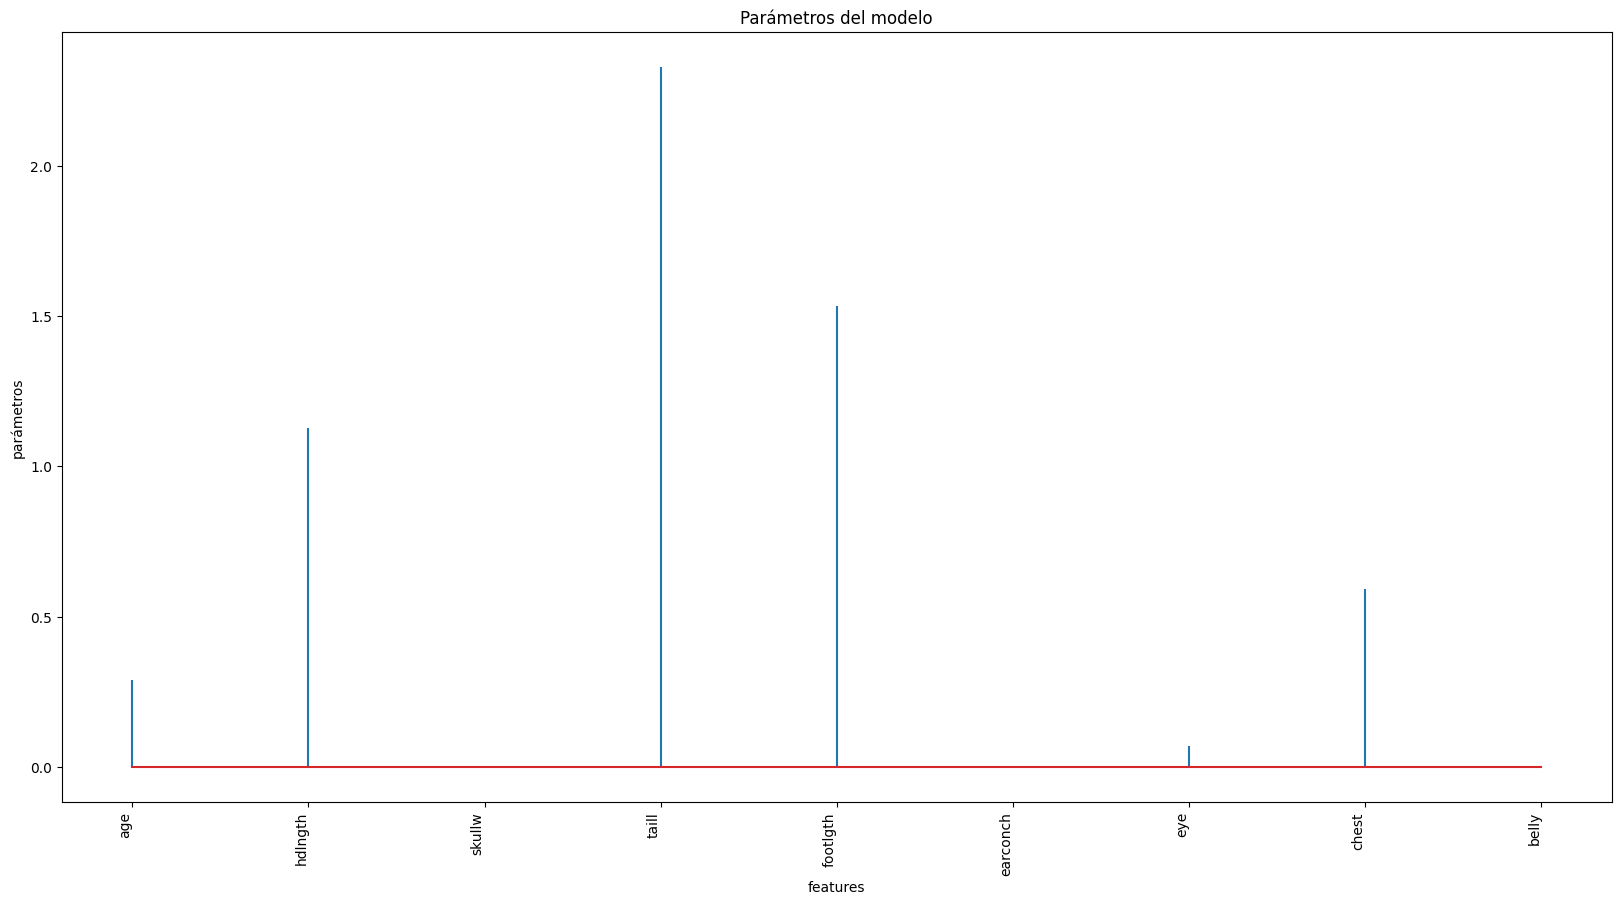

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
# Error de test del modelo

rmse_lasso = mean_squared_error(y_test,y_pred,squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 2.8943490343064924


In [ ]:
R2 = metrics.r2_score(y_test, y_pred)
R2

0.2496859532117398

### ElasticNet
ElasticNet, que combina las regularizaciones de Ridge y Lasso. Esto es útil cuando quieres combinar las ventajas de ambos métodos: la estabilidad de Ridge frente a la multicolinealidad y la capacidad de Lasso para seleccionar características.

el paranetro l1_ratio controla el balance entre la regularización L1 (Lasso) y L2 (Ridge)

In [ ]:
modelo = make_pipeline(StandardScaler(),
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-3, 6, 200),
                              cv              = 10
                           )
         )

_ = modelo.fit(X_train, y_train)

mod = modelo.steps[1][1]

In [ ]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,mod.alphas_,mse_cv,rmse_cv
1357,0.99,0.079341,4.989313,2.233677
1356,0.99,0.088049,4.989434,2.233704
1358,0.99,0.071494,4.990388,2.233918
1355,0.99,0.097712,4.990464,2.233935
1354,0.99,0.108437,4.992086,2.234298
...,...,...,...,...
602,0.70,811984.499318,19.363712,4.400422
601,0.70,901101.825167,19.363712,4.400422
600,0.70,1000000.000000,19.363712,4.400422
608,0.70,434701.315813,19.363712,4.400422


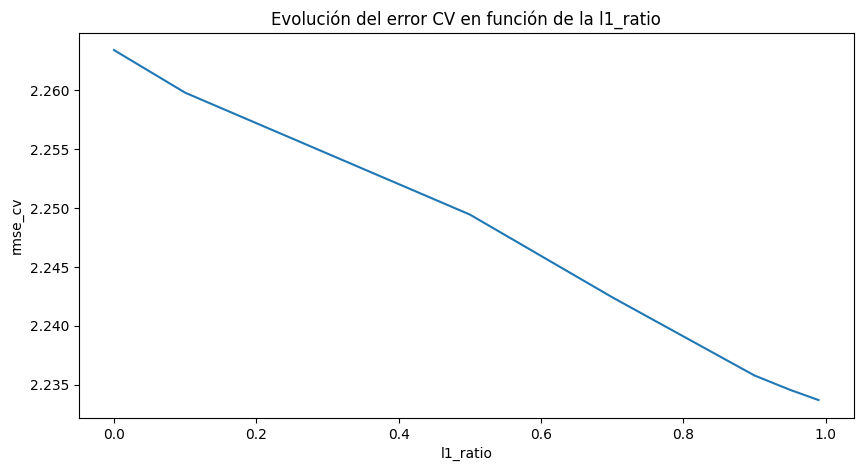

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [ ]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {mod.l1_ratio_}")

Mejor valor de alpha encontrado: 0.07934096665797492
Mejor valor de l1_ratio encontrado: 0.99


In [ ]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [ ]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [ ]:
# Error de test del modelo

rmse_elastic = mean_squared_error(y_test,y_pred, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")

In [ ]:
R2 = metrics.r2_score(y_test, y_pred)
R2

In [ ]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');